# No Dignity in Poverty: Can't stomach diarrhoea any longer (data viz perspective)

## Introduction

Fast backward to two years ago. I was suffering from a gastro-intestinal infection, which after several tests, I discovered was *H. Pylori* and even after several tests, was still suffering from the embarrasing effects of this pathogen.

Alright. Relax. Before you swipe over this blog, it's not aboute *me* per se, it's about others who may be suffering from other dysentry or gastrointestinal problems, which, based on my experience, felt that data science could bring this things into fore.

If you've worked with Dash-Plotly, you will know it is an amazing data visualization tool. However, learning it requires patience. It's like retrieving a thorn from two thorns. In this blog, we shall embark on a journey of creating a dashboard that shows the extent of diarrhoeal related deaths among children under 5 years upto the year 2019. It's a long read, so don't be in a rush to finish it.

## Data Cleaning

As always, in Python, you begin with loading the necessary packages. Bear in mind that the entire project was done in Pycharm but printed out in Jupyter.If you want to install a package into Pycharm, it is highly recommended you follow this [advisory](https://www.jetbrains.com/help/pycharm/installing-uninstalling-and-upgrading-packages.html#interpreter-settings).

In [1]:
# Import the required packages
import pandas as pd
import numpy as np
import plotly.express as px
from dash import Dash, dcc, html, Input, Output
import json
import time

No errors, so let's proceed with our call. Just add the following JavaScript looking code lines. They are to help in debugging a certain markdown we shall generate later.

In [2]:
styles = {
    'pre': {
        'border': 'thin lightgrey solid',
        'overflowX': 'scroll'
    }
}

Don't let the above code scare you, you'll soon be back into familiar territory. For now, let's download the dataset we want. It's from this website of [Our World in Data by Oxford](https://ourworldindata.org/childhood-diarrheal-diseases?utm_source=pocket_saves). Surely no phenomena is outside the study realm of scientists. But first, let's download the dataset which can be done from the site as shown in the visual below. But your's truly has been generous in uploading it to Github, available [here](https://raw.githubusercontent.com/sammigachuhi/dash_plotly_projects/main/data/diarrhoea_children_gdp.csv). Just a little change of the name!


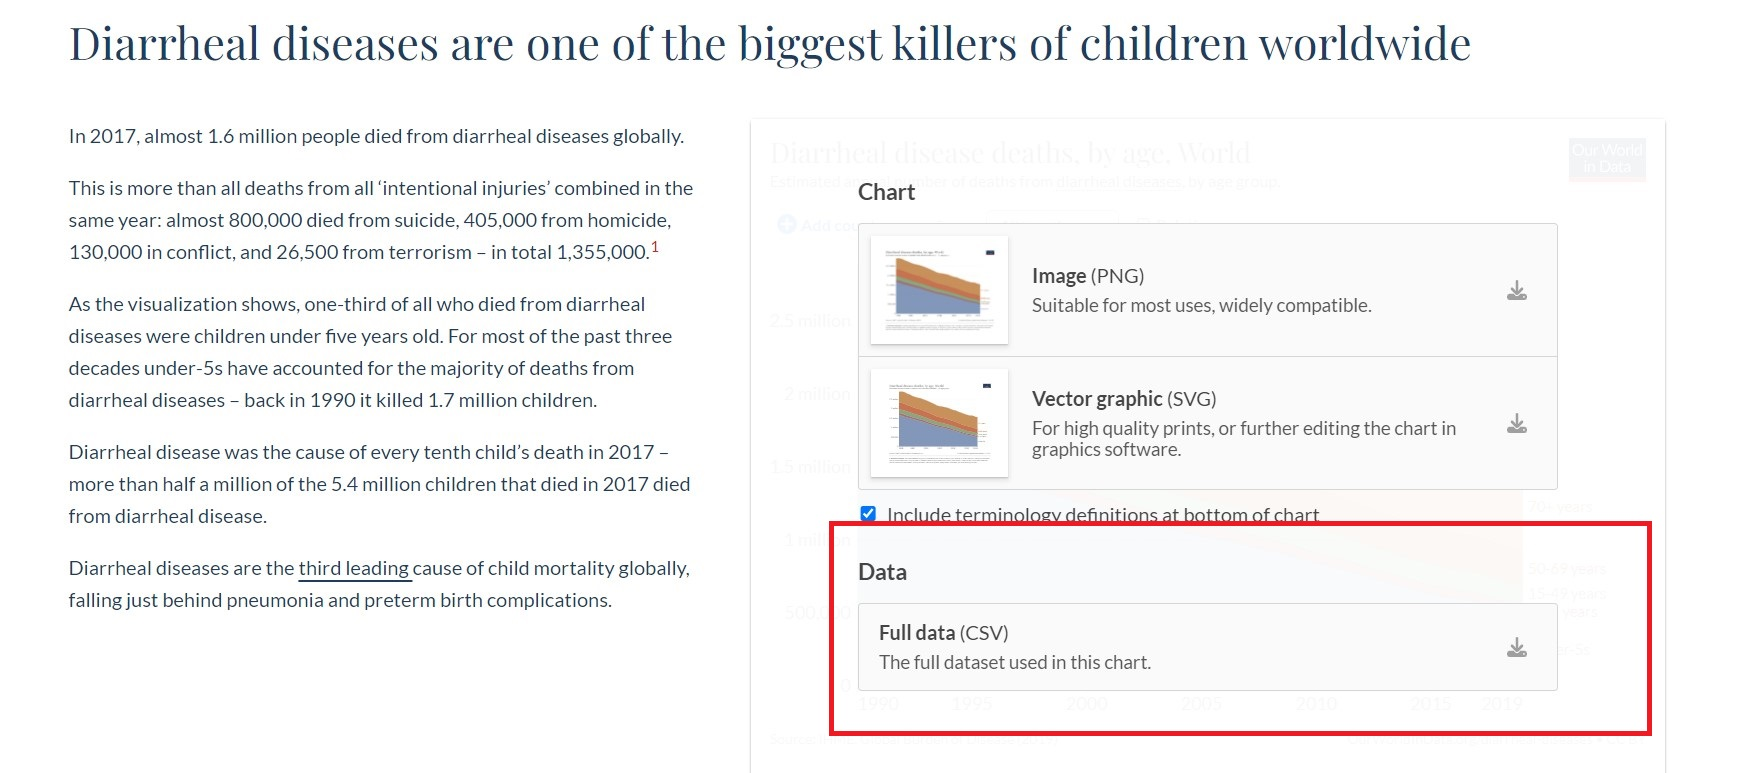

In [26]:
from IPython import display
display.Image("data/blog/download.jpg")


Alright, so you have been able to access the dataset eithe from the Oxford site or from Github, next in the pipeline is loading it to Pycharm or any other interpreter you may be using.

In [4]:
# Download the dataset
df = pd.read_csv("https://raw.githubusercontent.com/sammigachuhi/dash_plotly_projects/main/data/diarrhoea_children_gdp.csv")
df.head()

,Entity,Code,Year,Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Rate),"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1990,196.60,NaN,10694804.0,NaN
2,Afghanistan,AFG,1991,198.09,NaN,10745168.0,NaN
3,Afghanistan,AFG,1992,201.59,NaN,12057436.0,NaN
4,Afghanistan,AFG,1993,234.98,NaN,14003764.0,NaN


Alright.

Some sharp-sighted data scientist will not a common anomally with most datasets, some missing data, and they can be either *Null* or *NaN* values where in the latter they stand for *Not A Number*. We shall not go into the nitty gritty details of the differences between the two, but they do cause problems in data analysis, such as introducing bias to increasing memory usage if they are many in an extraordinarily large dataset. Because they cause a squirm to several well experienced (and well meaning) data scientists, let's remove them.

We will remove the NaN values in the column *Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Rate)", "Population (historical estimates)* since it is the crux of our data visualization project. Quite a mouthful of a name by the way.


In [5]:
# Now remove all null values in the column: "Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Rate)" 
df = df.dropna(
    subset=["Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Rate)", "Population (historical estimates)"])

# Let's check
df.head()

,Entity,Code,Year,Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Rate),"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
1,Afghanistan,AFG,1990,196.60,NaN,10694804.0,NaN
2,Afghanistan,AFG,1991,198.09,NaN,10745168.0,NaN
3,Afghanistan,AFG,1992,201.59,NaN,12057436.0,NaN
4,Afghanistan,AFG,1993,234.98,NaN,14003764.0,NaN
5,Afghanistan,AFG,1994,221.60,NaN,15455560.0,NaN


Since at some point we would like to aggregate the countries in our dataset into, say their respective continents, it would be good if if each country was associated with its respective continent. Our dataset has, but fall's short of allocating each country to its continent. There are many *NaN* values and aggregation doesn't work with missing values. Luckily, there are various open source datasets having both the country name, continent and other auxillary data such as country code. One just has to be smart in the common ID to use with that in their dataset, or create one if non existent.

Let's load one such geospatial dataset from one generous supplier.

In [6]:
# The below dataset contains country codes and their continents. We want to join the countries in our diarrhoea dataset
# to their sub-regions since the `continent` column in our diarrhoea dataset has missing values
df_code = pd.read_csv("https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv")
df_code.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


One thing to note: our initial `df` dataset had the country codes listed under the `Code` column. For our `df_code` dataset, they are listed under the  `alpha-3` column. We can create a common ID key between the `df` and the `df_code` datasets by creating a new column called `Code` for the `df_code` dataset. For a join operation to succeed, there has to be a common key between the two datasets to be joined.



In [7]:
# Create the commond ID key for df_code
df_code["Code"] = df_code["alpha-3"]
df_code.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code,Code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN,AFG
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN,ALA
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN,ALB
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN,DZA
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN,ASM


Now, the continents that we need are found in `df_code`s `sub-region` column. We want to add this column to our initial `df` dataset and thankfully, the join operation to do this is possible thanks to the common column, or rather, the common key `Code` existing in both datasets.



In [8]:
df = pd.merge(df, df_code[["Code", "sub-region"]], on="Code", how="left") # Merge with country `Code` to their continents

In [9]:
# Print out the joined df
df.head()

,Entity,Code,Year,Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Rate),"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent,sub-region
0,Afghanistan,AFG,1990,196.60,NaN,10694804.0,NaN,Southern Asia
1,Afghanistan,AFG,1991,198.09,NaN,10745168.0,NaN,Southern Asia
2,Afghanistan,AFG,1992,201.59,NaN,12057436.0,NaN,Southern Asia
3,Afghanistan,AFG,1993,234.98,NaN,14003764.0,NaN,Southern Asia
4,Afghanistan,AFG,1994,221.60,NaN,15455560.0,NaN,Southern Asia


As you can see, each country is joined to its rightful continent in our new `df` dataset!

It is tempting to scale up to deeper datascience work by just viewing a few lines of code in your interpreter. However, sometimes overanalysis is good. If you were to open the above dataset in let's say Excel, you will not that the `sub-region` column has several missing values as well which would obviously pose any problems to future aggregation exercises. In Python we can check for missing values like so:


In [10]:
# Check for missing values in sub-region
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6150 entries, 0 to 6149
Data columns (total 8 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Entity                                                         6150 non-null   object 
 1   Code                                                           6150 non-null   object 
 2   Year                                                           6150 non-null   int64  
 3   Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Rate)  6150 non-null   float64
 4   GDP per capita, PPP (constant 2017 international $)            5365 non-null   float64
 5   Population (historical estimates)                              6150 non-null   float64
 6   Continent                                                      204 non-null    object 
 7   sub-region                                                   

Ignoring all the other columns, there are around 30 missing values in the `sub-region` column. Let's remove them. No mercy here.

In [11]:
# Remove all rows with value `None` in column `sub-region`
df = df.dropna(subset=["sub-region"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6120 entries, 0 to 6149
Data columns (total 8 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Entity                                                         6120 non-null   object 
 1   Code                                                           6120 non-null   object 
 2   Year                                                           6120 non-null   int64  
 3   Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Rate)  6120 non-null   float64
 4   GDP per capita, PPP (constant 2017 international $)            5335 non-null   float64
 5   Population (historical estimates)                              6120 non-null   float64
 6   Continent                                                      204 non-null    object 
 7   sub-region                                                   

You can save the cleaned dataset to your local directory as you wish. 

*You always save the best for last... and to last*

In [12]:
# Save the cleaned dataframe
# df.to_csv("data/cleaned_df2.csv")

## Creating the Dash App

To create a dash app, you create a Dash instance and assign to the name of your app. For simplicity purposes, let's name the app as `app`.

In [13]:
app = Dash(__name__)

We shall also add another instance called `server` which shall enable us to publish our Dash-Plotly dashboard to a platform called Render.

In [14]:
server = app.server

Now to something that can be described more intuitively. To create a layout for your dashboard, we use the `layout` method. The layout is composed of a tree of "components" such as `html.Div` and `dcc.Graph` which are the building components of our Dash app.

To create a layout, you start with the following syntax:

```
app.layout = html.Div([])

```

Put a handbrake and let me give some advice to you enthusiastic programmer where image is everything to *members of the opposite sex, cars, houses, cities, offices, phones* et cetera, and yes, even `Dash`boards!

If building a dashboard, start simple and as you view it at the same time. Don't build everything at once and hit the `run` when you think it is complete. There is nothing as frustrating as an error(s) that appears when you have been coding hard while supposedly following all the right steps.

I always have a marxim: "slow and steady is better than fast and shoddy".

To run our dash script so far, we introduce an open sesame kind of code shown below.

```
if __name__ == "__main__":
    app.run(debug=True)
```
 
Now, what do the above code lines do? The first -- `if __name__ == "__main__":` has to do with running a script if it imported or not. The second part, `app.run(debug=True)` automatically [refreshes the browser](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwil67L4n8OAAxXSQaQEHVaiBeIQFnoECA0QAw&url=https%3A%2F%2Fmedium.com%2Finnovation-res%2Fhow-to-build-an-app-using-dash-plotly-and-python-and-deploy-it-to-aws-5d8d2c7bd652&usg=AOvVaw3BPzaFxkn8fcyLjGRWQXMB&opi=89978449) when you make changes. Quite helpful when doing editing!

So far, our framework looks as follows:

In [15]:
# Import the required packages
import pandas as pd
import numpy as np
import plotly.express as px
from dash import Dash, dcc, html, Input, Output
import json
import time

styles = {
    'pre': {
        'border': 'thin lightgrey solid',
        'overflowX': 'scroll'
    }
}

# Source of the data used is: https://ourworldindata.org/childhood-diarrheal-diseases?utm_source=pocket_saves
# from the download section of compound line graph

# Clean the dataset for: "D:\gachuhi\dash-projects\dash-layout\data\diarrhoea_children_gdp.csv"
# Specifically the CSV file: "diarrhoea_children_gdp.csv"

# Remove all rows that have null values in the column: "Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Rate)"
# and "Population (historical estimates)"

df = pd.read_csv("https://raw.githubusercontent.com/sammigachuhi/dash_plotly_projects/main/data/diarrhoea_children_gdp.csv")
# print(df)

# Now remove all null values in the column: "Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Rate)" and
# "Population (historical estimates)"
# df = df.copy()
df = df.dropna(
    subset=["Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Rate)", "Population (historical estimates)"])
# print(df)

# The below dataset contains country codes and their continents. We want to join the countries in our diarrhoea dataset
# to their sub-regions since the `continent` column in our diarrhoea dataset has missing values
df_code = pd.read_csv("https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv")
df_code["Code"] = df_code["alpha-3"]

df = pd.merge(df, df_code[["Code", "sub-region"]], on="Code", how="left") # Merge with country `Code` to their continents

# Remove all rows with value `None` in column `sub-region`
df = df.dropna(subset=["sub-region"])

# Save the cleaned dataframe
# df.to_csv("data/cleaned_df2.csv")

# Now to create the plotly dashboard
app = Dash(__name__)
server = app.server

app.layout = html.Div([
    
])

# if __name__ == "__main__": # Uncomment this in your file
#     app.run(debug=True)    # Uncomment this in your file

Running the above code with `py <name-of-your-dash-app>.py` in the PyCharm terminal produces the below result, an empty canvas since we have not parsed anything into `app.layout`. 

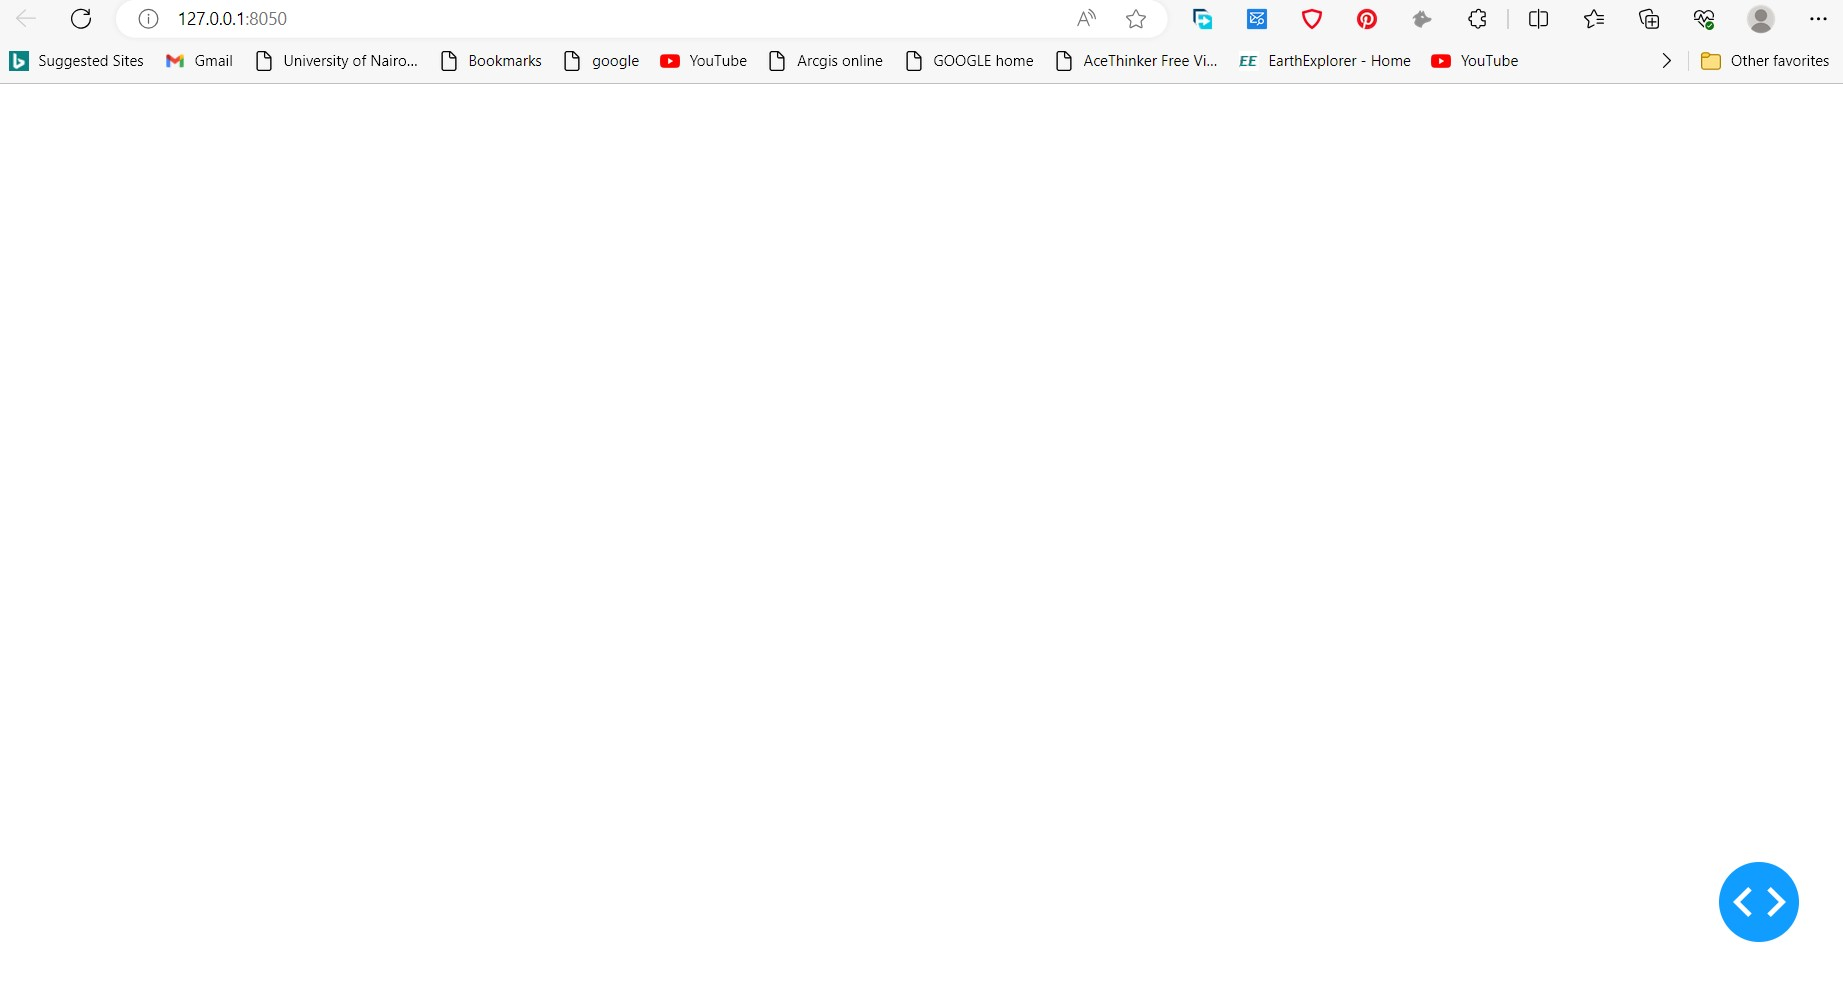

In [27]:
from IPython import display
display.Image("data/blog/empty.jpg")

A dash layout is composed of `html.Div` and `dcc.Graph` components. The former can be thought of as a wrapper that encapsulates any content that goes into it. The latter, on the other hand, is responsible for most plotly created data visualizations such as maps and graphs. It is mostly parsed with the `figure` argument.


## The Layout

The first components we shall parse into our layout is a heading and some background information concerning our dataset. In here you can also insert the inspiration for your project too.

Update the layout with the following code. Dash has a plethora of components. It is highly suggested for anything new, you kindly refer to their API reference which is actually, as large as the ocean but well simplified for both the crown fish and whale to swim in.

In [17]:
app.layout = html.Div([
    # 0 The heading
    html.H2(f"Diarrhoea related deaths amongs children <5 years, World"),

    html.Br(),

    dcc.Markdown("""
    Source: [Our World in Data](https://ourworldindata.org/childhood-diarrheal-diseases?utm_source=pocket_reader)

    Our World In Data is a project of the Global Change Data Lab, a registered charity in England 
    and Wales (Charity Number 1186433).
    """,
                 link_target="_blank"),

])

Hoping that your `if __name__ == "__main__": 
     app.run(debug=True)` is uncommented (unlike mine) and then running the terminal again at least shows first signs of life of our dashboard.

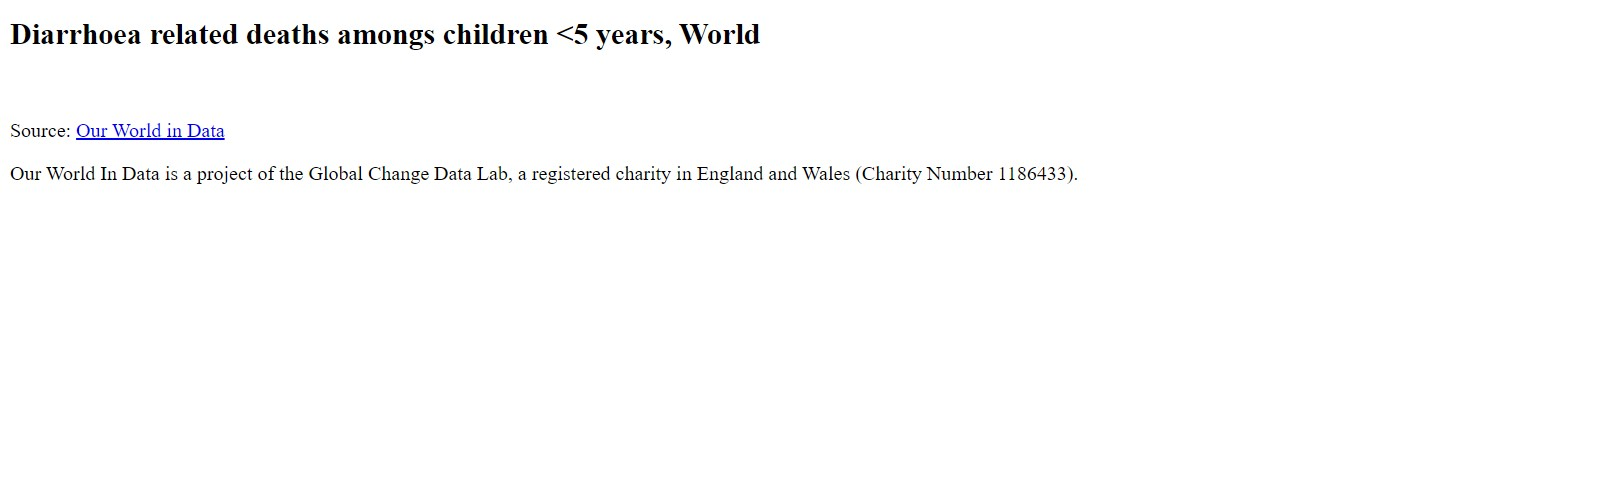

In [28]:
from IPython import display
display.Image("data/blog/life-signs.jpg")

At least for one, you can consider the intro part of your app is functional. Consider it like fighting with foot soldiers first before dealing with giants.

## The Graph

At least one foot soldier is down, we have plenty to go. Our second casualty shall be the global map. We need an interactive global map that is responsive to the year slider (you will see it later) and the country clicked. When the slider is moved, say, from 2013 to 2015, the map, which is ideally a choropleth map, should reflect the changes. When we click on a country, say Kenya, it should update some other graphs we'll come to later. 

Remember when we said that the `dcc.Graph` components stands for figures? Well, not just graphs but maps as well. It will be passed an ID, just like all dash components, so as to identify them in callbacks. If you will be using callbacks in Dash, each Dash component should have an ID.

Enough said. 

Let's add it.

```

-- snip--

    #1 the map layout
    dcc.Graph(id="map-year"),
```

We have mentioned a slider. The Dash component of a slider is `dcc.Slider`. Not that it also has its ID as well as other arguments.

```
#1 the map layout
    dcc.Graph(id="map-year"),
    
    #2 The slider
    dcc.Slider(
        df["Year"].min(),
        df["Year"].max(),
        step=None,
        id="year-slider",
        value=df["Year"].max(),
        marks={str(year): str(year) for year in df["Year"].unique()}
    ),
```

If you are curious, you can run your dash app again. You should see an empty graphic and a slider populated with all the years across our cleaned dataset `df`; from the earliest to the latest years in our `df` dataset.


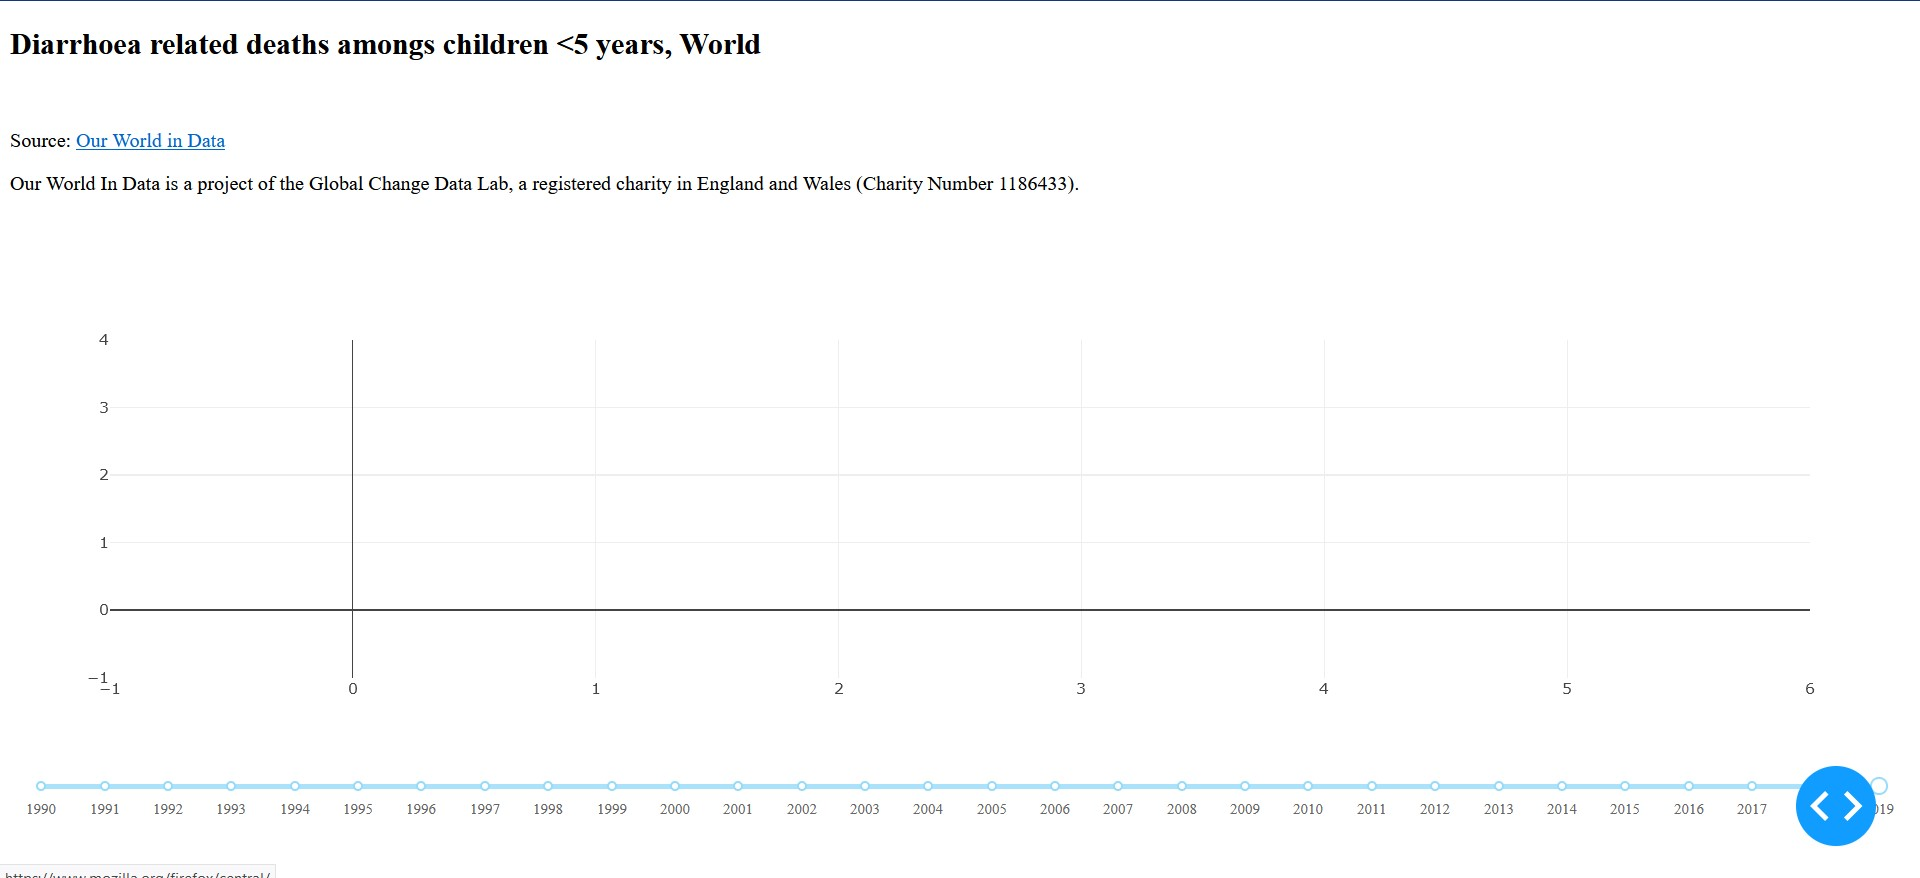

In [29]:
from IPython import display
display.Image("data/blog/map-slider.jpg")

In plotly, obviously, one can also plot two figures on the same row. We can place two figures side by side by putting them inside the same `html.Div` element. Think of `html.Div` as creating a division to put content into, as explained earlier. In our case, we want to display the heatmap and the scatterplot within the same division, I shall show how to place figures side by side later since for our heatmap and scatterplot case, it was a case of two elephants in the room. In other words, they appeared two squeezed to render any legible information.

Note I have added a new component --`html.Br()` to introduce a linebreak. Dash has several components.

```python
--snip--
#3 The heatmap and scatterplot on the same column
    html.Div([
        dcc.Graph(id="heat-map-country-year"),
        dcc.Graph(id="scatterplot-death-gdp-year")
    ]),

    html.Br(),
    --snip--
```

If you refresh the browser you are using to view your dash app, you will notice two empty figures added.

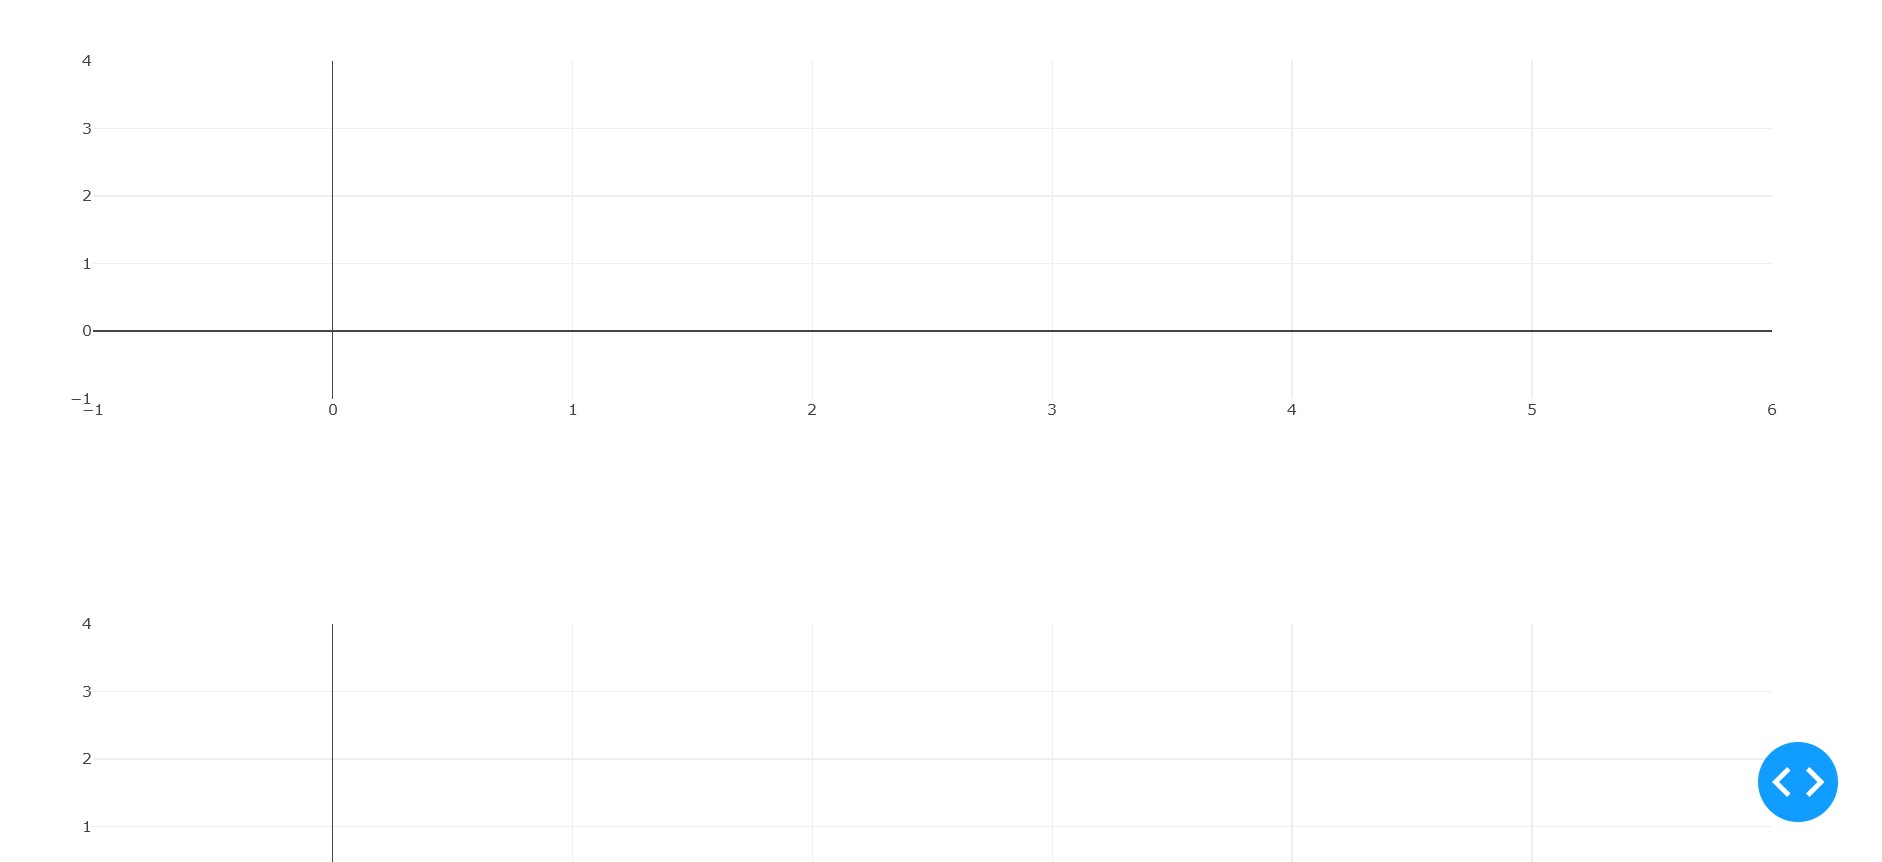

In [30]:
from IPython import display
display.Image("data/blog/two-figures.jpg")

We had mentioned earlier that we want our map to update some graphs when a country is clicked. The code that shall be introduced involves a markdown that is generated upon a user clicking certain *fields*, in our case the countries. How to create it has largely been borrowed from [here](https://dash.plotly.com/interactive-graphing).

```python
--snip--
##### This is to help in debugging capturing the clicked country on the choropleth map
    html.Div([
        dcc.Markdown("""
                **Click Data**

                Click on points in the graph.
                """),
        html.Pre(id='click-data', style=styles['pre']),
        ], className='three columns'),
    #########
```

In fact, the `style` object we had created earlier on right at the very beginning was for this specific code chunk. It was to style how our markdown shall appear, which is composed of [preformatted text](https://developer.mozilla.org/en-US/docs/Web/HTML/Element/pre) from our HTML as enabled by the `html.Pre` component.

If you refresh your browser, you will notice a new kid on the block. If we had our map ready, any country we clicked on the map will generate some text in that portion. Save your appetite for later.



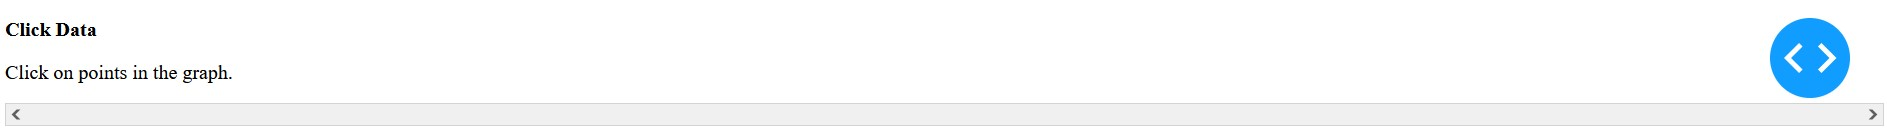

In [24]:
from IPython import display
display.Image("data/blog/pre.jpg")

I wanna quickly fulfill my promise so it's out of the way. It has been bugging you for too long anyway. How do we put two figures side by side? Well, there are various ways, but the easiest is putting the two Dash components inside a html, and using the `style` attribute of Dash to set the CSS placement styles for each. In the below code, we have set each figure to fill a width of 48% of the screen and both to be on the same block. The latter is enabled by the `"display": "inline-block"` CSS property.

```python
#4 Draw line graph of population of selected country dependent on country selected on map and likewise for
    # gdp per capita in one row
    html.Div([
        dcc.Graph(id="line-graph-population", style={"width": "48%", "display": "inline-block"}),
        dcc.Graph(id="line-graph-gdp-capita", style={"width": "48%", "display": "inline-block"})
    ]),
```

Finally, to close our long journey of creating our Dash app layout (`app.layout`) we shall add the last Dash component. Another graph.

```python
--snip--
#5 Draw bar graph of diarrhoea related deaths across the years
    dcc.Graph(id="diarrhoea-bar-graph"),
--snip--
```

You should have two empty figures side by side on the same row and one large graph below them like in the image below.


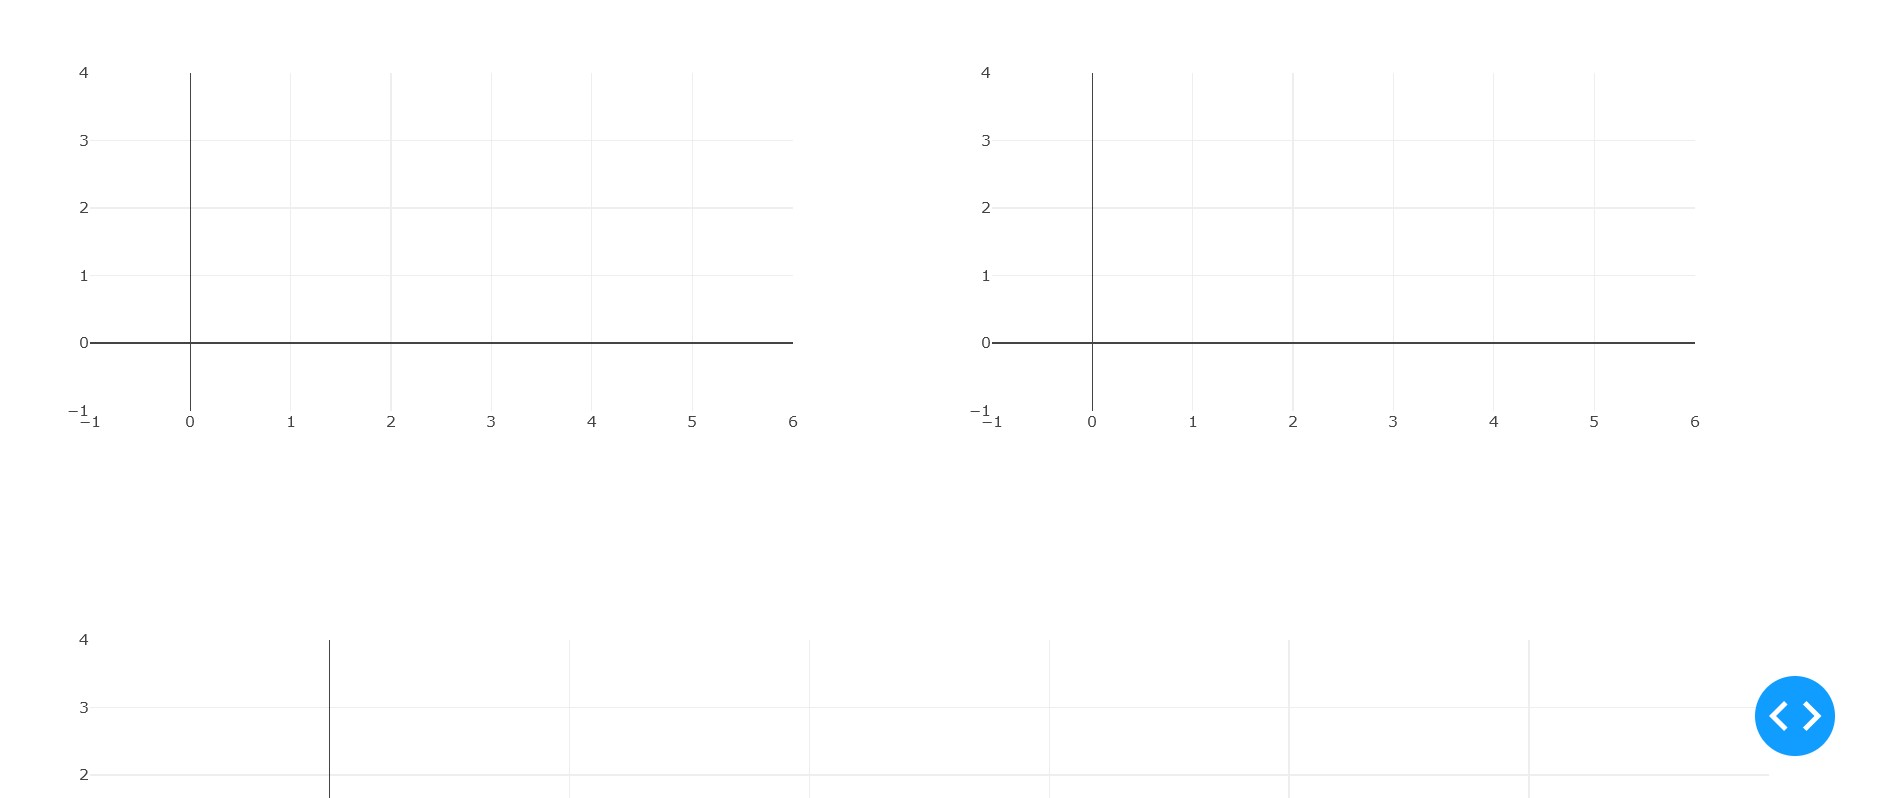

In [25]:
from IPython import display
display.Image("data/blog/two-last.jpg")

Wow. At least we have a skeleton in order. It only needs some flesh and some interactivity before it is one living app!

```python
app.layout = html.Div([
    # 0 The heading
    html.H2(f"Diarrhoea related deaths amongs children <5 years, World"),

    html.Br(),

    dcc.Markdown("""
    Source: [Our World in Data](https://ourworldindata.org/childhood-diarrheal-diseases?utm_source=pocket_reader)

    Our World In Data is a project of the Global Change Data Lab, a registered charity in England 
    and Wales (Charity Number 1186433).
    """,
                 link_target="_blank"),

    #1 the map layout
    dcc.Graph(id="map-year"),

    #2 The slider
    dcc.Slider(
        df["Year"].min(),
        df["Year"].max(),
        step=None,
        id="year-slider",
        value=df["Year"].max(),
        marks={str(year): str(year) for year in df["Year"].unique()}
    ),

    #3 The heatmap and scatterplot on the same column
    html.Div([
        dcc.Graph(id="heat-map-country-year"),
        dcc.Graph(id="scatterplot-death-gdp-year")
    ]),

    html.Br(), # This is to insert a line break.

##### This is to help in debugging capturing the clicked country on the choropleth map
    html.Div([
        dcc.Markdown("""
                **Click Data**

                Click on points in the graph.
                """),
        html.Pre(id='click-data', style=styles['pre']),
        ], className='three columns'),
    #########

#4 Draw line graph of population of selected country dependent on country selected on map and likewise for
    # gdp per capita in one row
    html.Div([
        dcc.Graph(id="line-graph-population", style={"width": "48%", "display": "inline-block"}),
        dcc.Graph(id="line-graph-gdp-capita", style={"width": "48%", "display": "inline-block"})
    ]),

#5 Draw bar graph of diarrhoea related deaths across the years
    dcc.Graph(id="diarrhoea-bar-graph"),


])
```

## Callbacks

What the heck is a callback? A [callback](https://java2blog.com/python-callback-function/) is simply a function that is passed inside another function. The function that has been placed inside another function is what is known as a callback. In other words, the function passed inside another serves as the argument of the *master* function it has been passed into. 

In Dash, callbacks are useful in updating the outputs, such as a figure, when some parts of the input components change.

Without further ado, let's create our first callback.

It should come after the `app.layout` section. In brief, the callback should have an `Output` and `Input` arguments and, yes, in that order. The `Output` refers to what will be the result while the `Input` refers to the input components that will influence the result (the `Output` in this case).

```python
# Callbacks section
## Callback for #1 The map layout
@app.callback(
    Output("map-year", "figure"),
    Input("year-slider", "value")
)

```

You will notice that the `Output` and `Input` arguments also contain their own arguments. The first argument, such as `map-year` in the case of the `Output` refers to the ID of our Dash component and the property it takes, in this case a figure. The same rules apply for the `Input` argument.

Leaving the callback as above will result in an error in our Dash app. According to the Dash rules, the callback function must appear immediately below this callback, not even line breaks are allowed as breathing space between the callback decorator and our callback function. Therefore, because a map was the first graphic in our app, we have to create the function that displays it. As you guessed, it will be written immediately below our callback decorator.

```python
--snip--
@app.callback(
    Output("map-year", "figure"),
    Input("year-slider", "value")
)
def update_map(year_slider):
    dff = df[df["Year"] == year_slider]

    fig = px.choropleth(dff, locations="Entity", locationmode="country names",
                        color="Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Rate)",
                        hover_name="Year",
                        color_continuous_scale=px.colors.sequential.Plasma,
                        title=f"Map showing deaths from diarrhoeal diseases for children <5 years in {year_slider}",
                        custom_data=["Entity"],
                        labels={
                            "Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Rate)": "Deaths"})

    fig.update_layout(transition={"easing": "elastic-out"})

    return fig
--snip--
```

Just two things to be mentioned. The rest such as `px.choropleth` and `update_layout` can be checked up in the Plotly API reference.

1. `year slider` inside `def update_map()` function - this was one of the most confusing things when beginning Plotly. It is only after understanding it that it made all the sense. The argument inside `def update_map` is actually a reference to the `year-slider` inside the callback decorator. Your callback function arguments should only contain the references to the inputs, in the exact order they have been listed inside your callback decorator. 

The naming of the argument in the callback function --`update_map` in our case, doesn't have to be similar with the `component_id` in your callback decorator. It can go by any name, such as `slider` or whatever. Just know it will go with the order you have put in your callback decorator.

2. The new `dff` in `dff = df[df["Year"] == year_slider]` - what this code line does is filter our dataset to only contain the rows of the year selected in our slider.

Now refresh your browser. You should see a plotly map staring back. Play around with the slider and note that the choropleth map changes the colour for various countries based on the year, as well as updating the title based on the year selected.




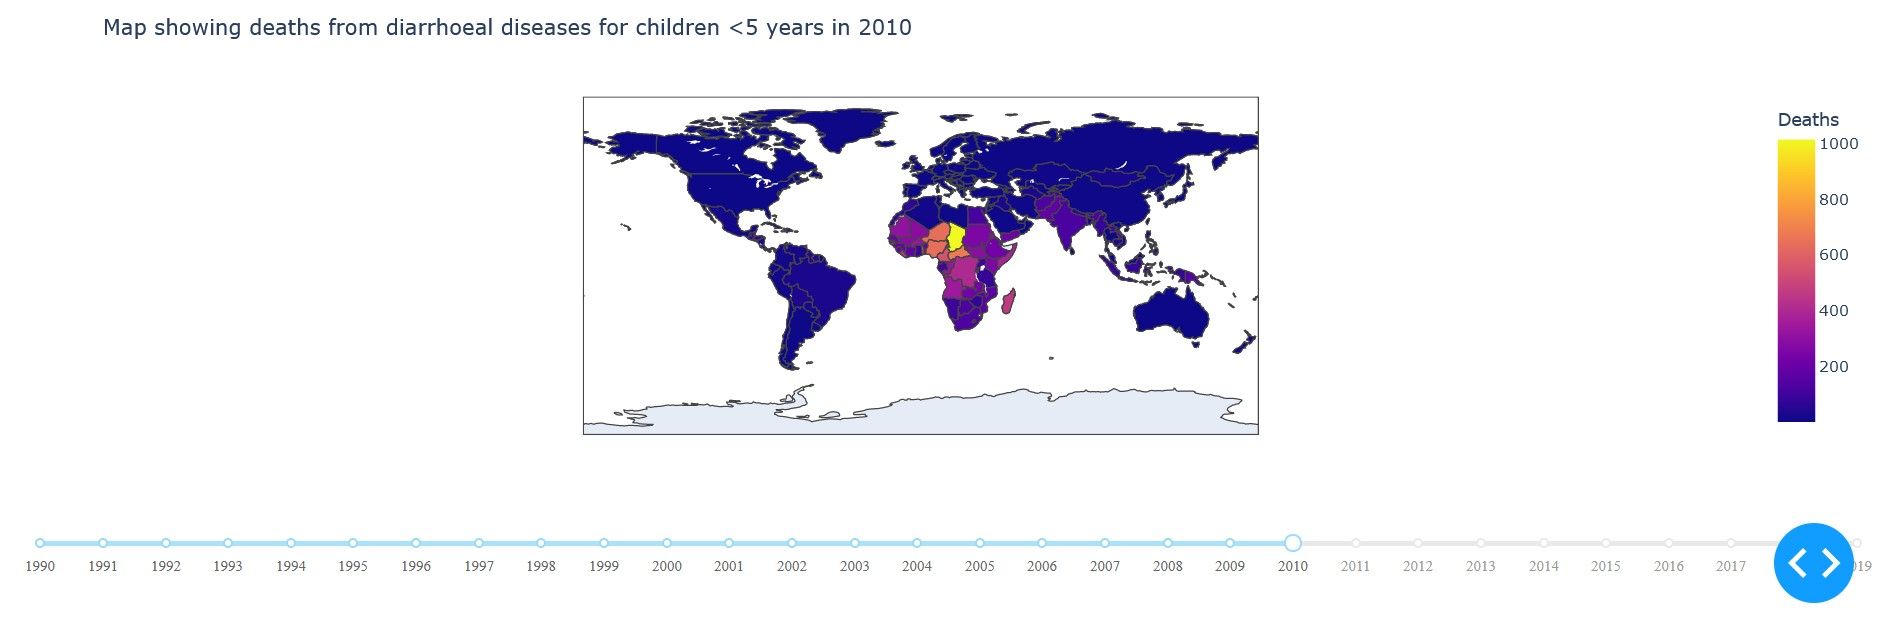

In [31]:
from IPython import display
display.Image("data/blog/interactive-map.jpg")